In [1]:
import networkx as nx
from burn_tree import *

In [2]:
balanced_tree = nx.balanced_tree(r=2, h=5)
print(balanced_tree.nodes)
print(balanced_tree.degree(0))
print(balanced_tree.degree(62))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
2
1


In [3]:
burning_sequence = burn_tree(balanced_tree)
print(burning_sequence)

[0, 1, 3, 7, 15, 31]


In [4]:
# Position the nodes nicely into a tree shape
pos = nx.nx_pydot.pydot_layout(balanced_tree, prog='dot')
nx.draw(balanced_tree, pos=pos, with_labels=True)

In [5]:
from graph_utils import create_adj_mat
import os
import math

# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree(tree)
            print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d} | {3:15} | {4:20}'.format(len(burning_sequence),
                                                                     tree.order(),
                                                                     math.ceil(math.sqrt(tree.order())),
                                                                     filename,
                                                                     str(burning_sequence)))

b(G)<= 2 | n= 6 | ceil(sqrt(n))= 3 | cross.mat       | [5, 3]              
b(G)<= 3 | n= 8 | ceil(sqrt(n))= 3 | ethane.mat      | [0, 7, 1]           
b(G)<= 2 | n= 5 | ceil(sqrt(n))= 3 | fork.mat        | [4, 2]              
b(G)<= 5 | n=32 | ceil(sqrt(n))= 6 | graph_1028.mat  | [0, 29, 28, 22, 19] 
b(G)<= 4 | n=13 | ceil(sqrt(n))= 4 | graph_156.mat   | [0, 6, 10, 2]       
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_164.mat   | [5, 8, 3]           
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_25135.mat | [9, 8, 3]           
b(G)<= 7 | n=46 | ceil(sqrt(n))= 7 | graph_26981.mat | [41, 17, 28, 22, 13, 43, 1]
b(G)<= 3 | n=12 | ceil(sqrt(n))= 4 | graph_27412.mat | [10, 8, 5]          
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_28507.mat | [0, 14, 11, 7]      
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_30698.mat | [13, 14, 12, 2]     
b(G)<= 4 | n=12 | ceil(sqrt(n))= 4 | graph_352.mat   | [0, 7, 10, 2]       
b(G)<= 4 | n=14 | ceil(sqrt(n))= 4 | graph_356.mat   | [0, 7, 11, 3]       
b(G)<

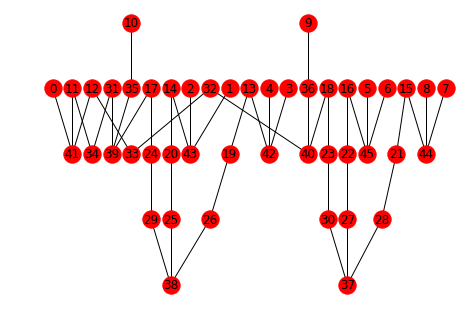

In [6]:
def show_graph(filepath):
    adj_mat = create_adj_mat(filepath)
    tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
    pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
    nx.draw(tree, pos=pos, with_labels=True)

filepath = './trees/graph_26981.mat'
show_graph(filepath)

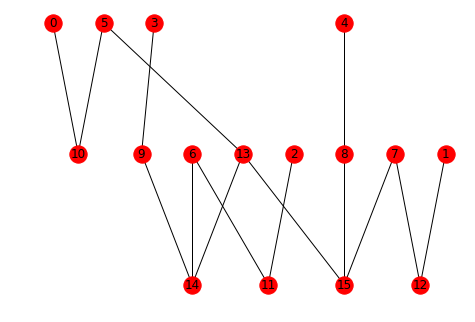

In [7]:
show_graph('./trees/graph_30698.mat')

In [12]:
from random import randint

# Generate random trees and burn them...
for i in range(100):
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    print('b(G)<={0:2d} | n={1:3d} | ceil(sqrt(n))={2:3d} | {3:20}'.format(len(burning_sequence),
                                                                     rand_tree.order(),
                                                                     math.ceil(math.sqrt(rand_tree.order())),
                                                                     str(burning_sequence)))
    if len(burning_sequence) > math.ceil(math.sqrt(rand_tree.order())):
        print("Burning sequence > sqrt(n)")
    

b(G)<= 8 | n= 95 | ceil(sqrt(n))= 10 | [0, 29, 60, 5, 65, 83, 16, 54]
b(G)<=10 | n=115 | ceil(sqrt(n))= 11 | [77, 29, 42, 71, 86, 1, 91, 98, 81, 41]
b(G)<= 9 | n= 89 | ceil(sqrt(n))= 10 | [0, 55, 46, 77, 22, 83, 58, 14, 81]
b(G)<= 9 | n=109 | ceil(sqrt(n))= 11 | [0, 50, 1, 101, 56, 66, 61, 35, 71]
b(G)<= 8 | n= 97 | ceil(sqrt(n))= 10 | [44, 66, 84, 81, 51, 49, 29, 77]
b(G)<= 3 | n= 11 | ceil(sqrt(n))=  4 | [5, 7, 1]           
b(G)<= 6 | n= 39 | ceil(sqrt(n))=  7 | [0, 11, 33, 25, 5, 8]
b(G)<= 5 | n= 42 | ceil(sqrt(n))=  7 | [23, 20, 3, 15, 10] 
b(G)<= 9 | n= 83 | ceil(sqrt(n))= 10 | [0, 8, 30, 39, 2, 19, 56, 41, 5]
b(G)<= 9 | n=106 | ceil(sqrt(n))= 11 | [0, 26, 71, 38, 68, 13, 24, 105, 3]
b(G)<= 2 | n=  4 | ceil(sqrt(n))=  2 | [0, 2]              
b(G)<= 8 | n= 66 | ceil(sqrt(n))=  9 | [65, 57, 42, 7, 35, 33, 34, 28]
b(G)<= 7 | n= 86 | ceil(sqrt(n))= 10 | [0, 74, 18, 5, 21, 39, 42]
b(G)<= 7 | n= 68 | ceil(sqrt(n))=  9 | [55, 66, 29, 32, 27, 13, 53]
b(G)<= 9 | n=117 | ceil(sqrt(n))= 11